In [2]:
import pandas as pd
from sklearn.datasets import make_regression, make_classification
from sklearn.metrics import r2_score, accuracy_score, precision_score
# If AutoML is not installed, uncomment below to lines to allow for correct importy
import os
# os.chdir("..")
# import auto_regression #, AutomatedClassification

from automl import AutomatedRegression

In [3]:
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=42)


df_X = pd.DataFrame(X)
# df_X['nine'] = pd.cut(df_X[9], bins=[-float('Inf'), -3, -1, 1, 3, float('Inf')], labels=['a', 'b', 'c', 'd', 'e'])
# df_X['ten'] = pd.cut(df_X[9], bins=[-float('Inf'), -1, 1, float('Inf')], labels=['A', 'B', 'C'])
df_y = pd.Series(y)


# prepare Autoregression object
regression = AutomatedRegression(
    y=df_y,
    X=df_X,
    # pca_value=0.95,
    # spline_value= 2,
    # poly_value={'degree': 2, 'interaction_only': True},
    n_trial=10,
    n_weak_models=10,
    # nominal_columns=['nine'],
    # ordinal_columns=['ten'],
    reload_study=True,
    reload_trial_cap=True,
    write_folder=f'{os.getcwd()}/testdir/tests',
    metric_optimise=r2_score,
    optimisation_direction='maximize',
    models_to_optimize=['bayesianridge', 'xgboost'],
    models_to_assess=['bayesianridge', 'xgboost'], # 'lightgbm'
    boosted_early_stopping_rounds = 20,
    )

In [5]:
import time

start = time.time()
# regression.apply()
regression.model_select_best()
regression.model_evaluate()
end = time.time()
print(end - start)
regression.summary

[I 2024-02-14 17:45:13,722] Using an existing study with name 'regression_bayesianridge' instead of creating a new one.


Number of unique weak models less than requested number of weak models: 9 < 10 
n_weak_models set to total number of weak models instead.


[I 2024-02-14 17:45:13,764] Using an existing study with name 'regression_xgboost' instead of creating a new one.


Number of unique weak models less than requested number of weak models: 3 < 10 
n_weak_models set to total number of weak models instead.
_________________________
Stacked model overwritten
_________________________

9.742929935455322


{'bayesianridge_best': [[1.4260159275636397e-08, 1.8493606778309503e-09],
  [1.0, 0.0]],
 'bayesianridge_1': [[9.191126333257628, 0.8899251064735699],
  [0.8022355150024805, 0.15310650050839883]],
 'bayesianridge_0': [[9.235576751649765, 0.911225767750783],
  [0.8021644884538539, 0.15314831186316769]],
 'bayesianridge_6': [[9.1899713445663, 0.8905095559156689],
  [0.8022301842291985, 0.15310345816273963]],
 'bayesianridge_2': [[29.60897069044686, 4.6294861106944],
  [0.572650300826991, 0.02644527781399713]],
 'bayesianridge_9': [[9.291438119857242, 0.9293410488614094],
  [0.8020950944909139, 0.15323148371967893]],
 'bayesianridge_5': [[10.617740503974437, 1.1594939864811],
  [0.8314248296510618, 0.09921828744497127]],
 'bayesianridge_8': [[9.190963155200084, 0.8898578096360985],
  [0.8022356115369538, 0.15310630148746016]],
 'bayesianridge_7': [[9.22351060590052, 0.8824413695843913],
  [0.8022941911950783, 0.15305810307116657]],
 'bayesianridge_4': [[1.222658596589099e-09, 1.5855577000

Clustering...
Calculating Shapely values...


100%|██████████| 40/40 [00:37<00:00,  1.06it/s]


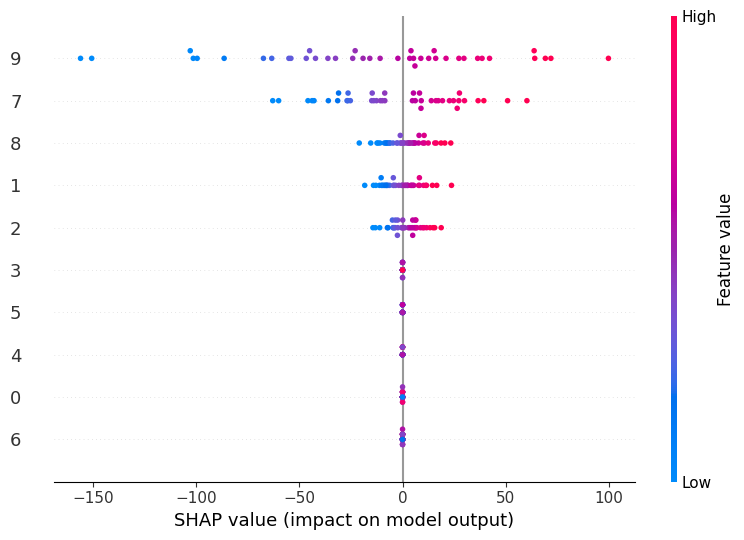

(               0          1          2             3             4  \
 0   2.942500e-08   5.424493  -2.491907  2.030121e-06 -1.918041e-06   
 1   5.951694e-07   2.628793   6.938284  3.266281e-06  5.729267e-06   
 2  -2.291135e-06   1.971243  18.716299  3.423731e-06 -2.910421e-06   
 3  -5.680286e-07  -4.479206  -0.190289  4.286276e-06  1.154067e-06   
 4  -2.093379e-06  -7.062294   0.563700 -8.204294e-06 -2.218879e-06   
 5  -1.249110e-06  10.170078  15.571635  2.671337e-06  1.672769e-06   
 6  -6.582618e-08 -10.165710 -13.169058 -7.007359e-06 -1.016707e-06   
 7  -1.755151e-06   4.958224   6.447978  5.222524e-06 -3.444890e-06   
 8   4.614227e-07  23.701054   4.914593  2.953535e-06 -4.714337e-07   
 9  -1.065852e-06   2.397234   9.768973  2.089721e-06 -3.405875e-06   
 10  4.741269e-07 -14.077882   8.685314 -2.268092e-06  3.573113e-07   
 11 -2.831790e-07   0.200132  -3.903171  5.168949e-06 -3.257295e-06   
 12  6.567517e-07 -18.326368 -14.349152 -3.682526e-06  6.723104e-06   
 13  1

In [8]:
regression.model_feature_importance(n_train_points=100, n_test_points=40)